In [1]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt 

In [2]:
class KNN:
    def __init__(self, k):
        self.k = k 
        self.euclidian_distance = lambda x1, x2: np.sqrt(np.sum(np.array(x1) - np.array(x2)) **2)

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            #calculate the euclidean distance from each example in the training dataset 
            distances = [self.euclidian_distance(x, x_train) for x_train in self.X_train]
            #find the (k) closest neighbors, the neighbors with the least eulidean distance
            closest_indices = np.argsort(distances)[:self.k]
            #most common neighbors 
            k_nearest_labels = self.y_train[closest_indices]

            predictions.append(Counter(k_nearest_labels).most_common()[0][0])
        
        return predictions              

In [6]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2)
X_train, X_test, y_train, y_test = X[:7], X[7:], y[:7], y[7:]


In [7]:
knn = KNN(3)
knn.fit(X_train,y_train)

In [9]:
np.sum((y_test == knn.predict(X_test))) / len(X_test)

1.0

In [11]:
clusters_color = ["red","blue"]

new_point = [-3.9, 0]
new_point_class = knn.predict([new_point])[0]

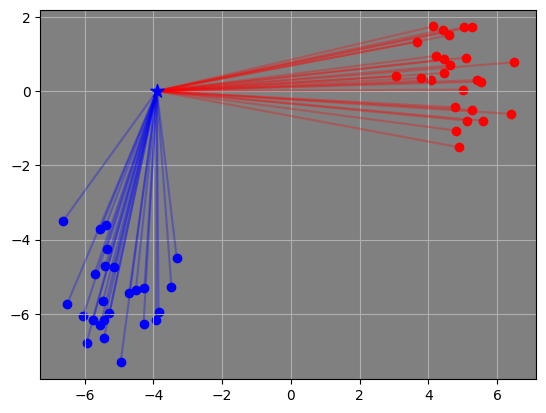

In [12]:
ax = plt.subplot()
ax.grid(True)
ax.set_facecolor("gray")


new_point_color = "red" if new_point_class==0 else "blue"
ax.scatter(new_point[0], new_point[1], marker="*",color=new_point_color, s=100, zorder=100)

for point, color_index in zip(X,y):
    ax.scatter(point[0], point[1], color=clusters_color[color_index])
    #draw a line from the new point to all the points in the train set
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color=clusters_color[color_index], linestyle="-", alpha=.3)

In [13]:
X, y = datasets.make_blobs(n_samples=50, n_features=3, centers=2)
knn = KNN(3)
knn.fit(X,y)

new_point = [-3.9, 0, 4]
new_point_class = knn.predict([new_point])[0]

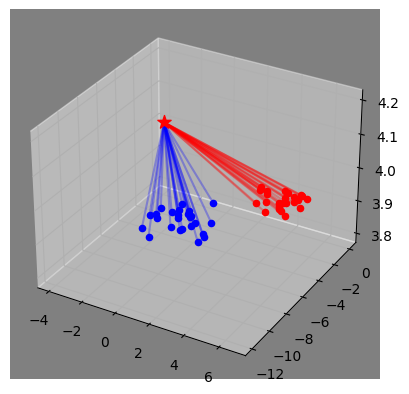

In [14]:
#3d plot
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_facecolor("gray")

new_point_color = "red" if new_point_class==0 else "blue"
ax.scatter(new_point[0], new_point[1],new_point[2], marker="*",color=new_point_color, s=100, zorder=100)

for point, color_index in zip(X,y):
    ax.scatter(point[0], point[1],new_point[2], color=clusters_color[color_index])
    #draw a line from the new point to all the points in the train set
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]],[new_point[2], new_point[2]], color=clusters_color[color_index], linestyle="-", alpha=.3)